In [2663]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2664]:
train = pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')

In [2665]:
train.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [2666]:
train.shape,test.shape

((54808, 14), (23490, 13))

## Checking imbalance in target column


In [2667]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

## Understanding the train data (checking for null values and other important parameters)

In [2668]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [2669]:
train.isnull().sum()/len(train)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [2670]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [2671]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [2672]:
import matplotlib.pyplot as plt
object_df = train.select_dtypes(include='object')
for i in object_df.columns:
    print(object_df[i].value_counts()/len(train)*100)
    print()

Sales & Marketing    30.725442
Operations           20.705007
Procurement          13.023646
Technology           13.023646
Analytics             9.764998
Finance               4.627062
HR                    4.411765
Legal                 1.895709
R&D                   1.822727
Name: department, dtype: float64

region_2     22.520435
region_22    11.728215
region_7      8.836301
region_15     5.123340
region_13     4.831411
region_26     4.123486
region_31     3.530506
region_4      3.107211
region_27     3.026930
region_16     2.672967
region_28     2.404758
region_11     2.399285
region_23     2.143848
region_29     1.813604
region_32     1.724201
region_19     1.594658
region_20     1.550868
region_14     1.508904
region_25     1.494307
region_17     1.452343
region_5      1.397606
region_6      1.258940
region_30     1.198730
region_8      1.195081
region_10     1.182309
region_1      1.112976
region_24     0.926872
region_12     0.912276
region_9      0.766311
region_21     0.7498

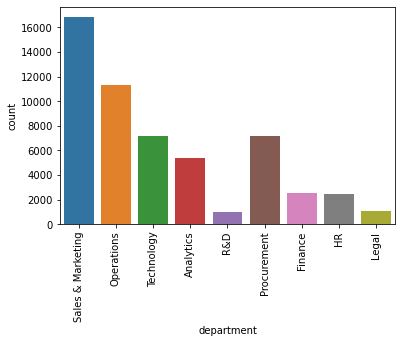

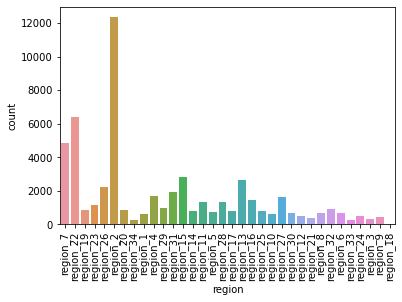

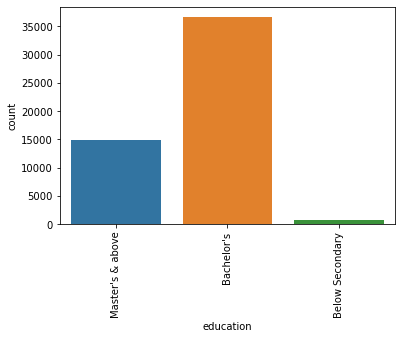

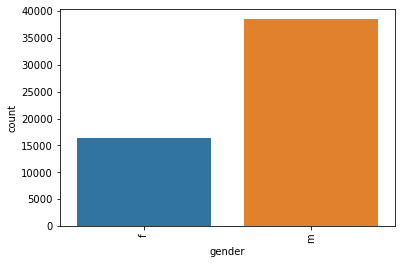

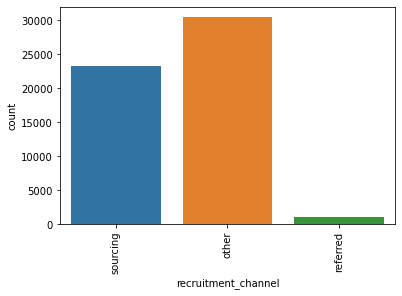

In [2673]:
for i in object_df.columns:
    sns.countplot(object_df[i])
    plt.xticks(rotation=90)
    plt.show()

In [2674]:
train.describe() 

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [2675]:
train[train['education'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,0,53,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,0,86,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,0,53,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0


## Imputing the Null Values

In [2676]:
train['education'] = train['education'].fillna(method='ffill')


In [2677]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(method='ffill')


In [2678]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [2679]:
train['previous_year_rating'].value_counts()/len(train)*100

3.0    36.717268
5.0    23.153554
4.0    19.513575
1.0    12.282878
2.0     8.332725
Name: previous_year_rating, dtype: float64

In [2680]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [2681]:
train.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


## Editting the test data 

In [2682]:
test.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51


In [2683]:
test.isnull().sum()/len(test)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [2684]:
# imputing null valus of the test data.

In [2685]:
test['education'] = test['education'].fillna(method='ffill')
test['previous_year_rating'] = test['previous_year_rating'].fillna(method='bfill')


In [2686]:
test.isnull().sum()/len(test)*100

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
dtype: float64

## Encoding the variables

In [2687]:
train.shape

(54808, 14)

In [2688]:
train.shape

(54808, 14)

In [2689]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [2690]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [2691]:
department_encode = (train.groupby('department').size()/len(train))
region_encode = (train.groupby('region').size()/len(train))
education_encode = (train.groupby('education').size()/len(train))
gender_encode = (train.groupby('gender').size()/len(train))
recruitment_channel_encode = (train.groupby('recruitment_channel').size()/len(train))

In [2692]:
train['department'] = train['department'].apply(lambda x : department_encode[x])
train['region'] = train['region'].apply(lambda x : region_encode[x])
train['education'] = train['education'].apply(lambda x : education_encode[x])
train['gender'] = train['gender'].apply(lambda x : gender_encode[x])
train['recruitment_channel'] = train['recruitment_channel'].apply(lambda x : recruitment_channel_encode[x])

In [2693]:
# encoding test data:
department_encode = (test.groupby('department').size()/len(test))
region_encode = (test.groupby('region').size()/len(test))
education_encode = (test.groupby('education').size()/len(test))
gender_encode = (test.groupby('gender').size()/len(test))
recruitment_channel_encode = (test.groupby('recruitment_channel').size()/len(test))

test['department'] = test['department'].apply(lambda x : department_encode[x])
test['region'] = test['region'].apply(lambda x : region_encode[x])
test['education'] = test['education'].apply(lambda x : education_encode[x])
test['gender'] = test['gender'].apply(lambda x : gender_encode[x])
test['recruitment_channel'] = test['recruitment_channel'].apply(lambda x : recruitment_channel_encode[x])

In [2694]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,0.307254,0.088363,0.284247,0.297621,0.423661,1,35,5.0,8,1,0,49,0
1,65141,0.207050,0.117282,0.700445,0.702379,0.555503,1,30,5.0,4,0,0,60,0
2,7513,0.307254,0.015947,0.700445,0.702379,0.423661,1,34,3.0,7,0,0,50,0
3,2542,0.307254,0.021438,0.700445,0.702379,0.555503,2,39,1.0,10,0,0,50,0
4,48945,0.130236,0.041235,0.700445,0.702379,0.555503,1,45,3.0,2,0,0,73,0


In [2695]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  float64
 2   region                54808 non-null  float64
 3   education             54808 non-null  float64
 4   gender                54808 non-null  float64
 5   recruitment_channel   54808 non-null  float64
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 5.9 MB


In [2696]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,0.128182,0.043040,0.694381,0.706513,0.424053,1,24,3.0,1,1,0,77
1,74430,0.046190,0.032993,0.694381,0.293487,0.556748,1,31,3.0,5,0,0,51
2,72255,0.311409,0.049681,0.694381,0.706513,0.556748,1,31,1.0,4,0,0,47
3,38562,0.128565,0.225585,0.694381,0.293487,0.556748,3,31,2.0,9,0,0,65
4,64486,0.046445,0.017625,0.694381,0.706513,0.424053,1,30,4.0,7,0,0,61


In [2697]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  float64
 2   region                23490 non-null  float64
 3   education             23490 non-null  float64
 4   gender                23490 non-null  float64
 5   recruitment_channel   23490 non-null  float64
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 2.3 MB


## Train test split on train data and creating validation dataset

In [2698]:
from sklearn.model_selection import train_test_split

In [2699]:
test1 = test.drop('employee_id',axis=1)

In [2700]:
final = train.drop('employee_id',axis=1)

In [2701]:
final.drop_duplicates(inplace=True)

In [2702]:
x = final.drop('is_promoted',axis=1)
y = final['is_promoted']

In [2703]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=20)

## Base Model (Logistic regression model)

In [2704]:
import statsmodels.api as sma

In [2705]:
logreg = sma.Logit(ytrain,xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.254679
         Iterations 7


In [2706]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:            is_promoted   No. Observations:                43774
Model:                          Logit   Df Residuals:                    43762
Method:                           MLE   Df Model:                           11
Date:                Sun, 17 Oct 2021   Pseudo R-squ.:                  0.1304
Time:                        16:52:33   Log-Likelihood:                -11148.
converged:                       True   LL-Null:                       -12821.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
department               2.0754      0.234      8.881      0.000       1.617       2.533
region                  -0.3504      0.234     -1.498      0.134      -0.809       0.108
education   

In [2707]:
y_pred_prob = logreg.predict(xtest)

In [1642]:
y_pred_logreg = [0 if x<0.7 else 1 for x in y_pred_prob]

In [1643]:
print(classification_report(ytest,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15967
           1       0.69      0.03      0.06      1543

    accuracy                           0.91     17510
   macro avg       0.80      0.51      0.51     17510
weighted avg       0.89      0.91      0.88     17510



## Logistic Rgression

In [1644]:
import statsmodels.api as sma
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,log_loss,roc_auc_score,precision_score,classification_report,plot_roc_curve,roc_curve,auc

In [1645]:
model_lr = lr.fit(xtrain, ytrain)
lr_accuracy = model_lr.score(xtrain, ytrain)
ypred_lr = model_lr.predict(xtest)
print(classification_report(ytest, ypred_lr))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     15967
           1       0.54      0.09      0.15      1543

    accuracy                           0.91     17510
   macro avg       0.73      0.54      0.55     17510
weighted avg       0.89      0.91      0.88     17510



In [1646]:
lr_accuracy

0.9181090088153085

## Random Forest Classifier

In [1647]:
from sklearn.ensemble import RandomForestClassifier

In [1648]:
rfc = RandomForestClassifier(n_estimators=100)

In [1649]:
rfc_model = rfc.fit(xtrain,ytrain)
rfc_pred = rfc_model.predict(xtest)

In [1650]:
rfc_accuracy = accuracy_score(ytest,rfc_pred)
rfc_accuracy

0.932609937178755

In [1651]:
print(classification_report(ytest,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15967
           1       0.84      0.29      0.43      1543

    accuracy                           0.93     17510
   macro avg       0.89      0.64      0.70     17510
weighted avg       0.93      0.93      0.92     17510



## Decision tree CLassifier

In [1652]:
from sklearn.tree import DecisionTreeClassifier

In [1653]:
dtc = DecisionTreeClassifier(criterion='entropy',
    splitter='best',max_depth=5)

In [1654]:
dtc_model = dtc.fit(xtrain,ytrain)
dtc_pred = dtc_model.predict(xtest)
dtc_accuracy = accuracy_score(ytest,dtc_pred)
dtc_accuracy

0.9246716162193033

In [1655]:
dtc_model.score(xtest,ytest)

0.9246716162193033

## Gradient boosting Classifier

In [1656]:
from sklearn.ensemble import GradientBoostingClassifier

In [2387]:
gbc = GradientBoostingClassifier(learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=3)

In [2388]:
gbc_model = gbc.fit(xtrain,ytrain)
gbc_pred = gbc_model.predict(xtest)
gbc_accuracy = accuracy_score(ytest,gbc_pred)
gbc_accuracy

0.9409310496267018

## Ada Boost Classifier

In [1862]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()

In [1863]:
adc_model = adc.fit(xtrain,ytrain)
adc_pred = adc_model.predict(xtest)
adc_accuracy = accuracy_score(ytest,adc_pred)
adc_accuracy

0.9246345029239766

## Xgboost

In [2708]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=20)

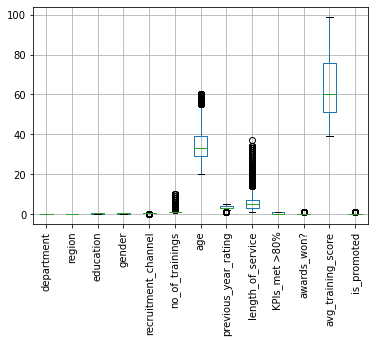

In [2714]:
final.boxplot()
plt.xticks(rotation=90)
plt.show()

In [2715]:
import xgboost as xgb

In [2716]:
from xgboost import XGBClassifier

In [2717]:
x2 = XGBClassifier()

In [2718]:
x_model = x2.fit(xtrain,ytrain)
x_pred = x_model.predict(xtest)
x_accuracy = accuracy_score(ytest,x_pred)
x_accuracy

0.9390350877192982

## Stacking Classifier

In [2468]:
from sklearn.ensemble import BaggingClassifier

In [2469]:
base  = [('Decision tree',DecisionTreeClassifier()),
        ('Random Forest',RandomForestClassifier()), 
        ('Log reg', LogisticRegression()),
        ('Bagging',BaggingClassifier()),
        ('Xgboost',XGBClassifier())]

In [1932]:
from sklearn.ensemble import StackingClassifier
stck = StackingClassifier(estimators=base,final_estimator=BaggingClassifier())

In [1933]:
stck_model = stck.fit(xtrain,ytrain)

In [1934]:
stck_pred = stck_model.predict(xtest)
stck_accuracy = accuracy_score(ytest,stck_pred)
stck_accuracy

0.9347222222222222

## Applying SMOTE to improve the model

In [1490]:
from imblearn.over_sampling import SMOTE

In [1491]:
oversample = SMOTE(k_neighbors=10)

In [1492]:
a1,b1 = oversample.fit_resample(xtrain,ytrain)

In [1493]:
a1.shape,b1.shape

((70162, 12), (70162,))

In [1494]:
model_lr = lr.fit(a1, b1)

ypred_lr = model_lr.predict(xtest)
print(classification_report(ytest, ypred_lr))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     14971
           1       0.19      0.73      0.31      1445

    accuracy                           0.71     16416
   macro avg       0.58      0.72      0.56     16416
weighted avg       0.90      0.71      0.77     16416



In [1495]:
gbc_model = gbc.fit(a1,b1)
gbc_pred = gbc_model.predict(xtest)
gbc_accuracy = accuracy_score(ytest,gbc_pred)
gbc_accuracy

0.9353070175438597

In [1496]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(a1,b1)
rfc_pred = rfc_model.predict(xtest)
rfc_accuracy = accuracy_score(ytest,rfc_pred)
rfc_accuracy

0.9237938596491229

In [1497]:
x_model = x2.fit(a1,b1)
x_pred = x_model.predict(xtest)
x_accuracy = accuracy_score(ytest,x_pred)
x_accuracy

0.9375

In [1498]:
adc_model = adc.fit(a1,b1)
adc_pred = adc_model.predict(xtest)
adc_accuracy = accuracy_score(ytest,adc_pred)
adc_accuracy

0.8550804093567251

In [1935]:
stck_pred_test = stck_model.predict(test1)

In [2612]:
x_pred_test = x_model.predict(test1)

In [1381]:
dtc_pred_test = dtc_model.predict(test1)

In [2389]:
gbc_pred_test = gbc_model.predict(test1)

In [865]:
adc_pred_test = adc_model.predict(test1)

In [1195]:
rfc_pred_test = rfc_model.predict(test1)

In [514]:
lr_pred_test = model_lr.predict(test1)

In [1396]:
logreg_pred_test = logreg.predict(test1)

In [1429]:
logreg_pred_test

0        0.229856
1        0.023383
2        0.017671
3        0.019197
4        0.043894
           ...   
23485    0.102406
23486    0.061716
23487    0.052009
23488    0.024144
23489    0.083417
Length: 23490, dtype: float64

In [1482]:
y_pred_last = [0 if x<0.3 else 1 for x in logreg_pred_test]

In [1483]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [2265]:
a = test.drop(['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],axis=1)

In [2613]:
b = pd.DataFrame(x_pred_test)

In [2614]:
predicted_df = pd.concat([a,b],axis=1)

In [2615]:
predicted_df = predicted_df.rename({0:'is_promoted'},axis=1)

In [2616]:
predicted_df.to_csv('xgbmodel.csv',index=False)

In [2617]:
predicted_df['is_promoted'].value_counts()

0    23490
Name: is_promoted, dtype: int64

In [2618]:
x_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [2619]:
b

,0
0,0
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


In [1063]:
a

,employee_id
0,8724
1,74430
2,72255
3,38562
4,64486
...,...
23485,53478
23486,25600
23487,45409
23488,1186


In [792]:
c

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
23484,NaN
23485,NaN
23486,NaN
23487,NaN


In [681]:
test['employee_id'] = test['employee_id'].astype('int64')

In [1087]:
final[final.duplicated()]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
1100,0.018957,0.225204,0.712998,0.702379,0.423661,1,30,3.0,1,0,0,63,0
5889,0.307254,0.225204,0.712998,0.702379,0.555503,1,23,3.0,1,0,0,49,0
5890,0.307254,0.035305,0.712998,0.702379,0.423661,1,24,3.0,1,0,0,53,0
7887,0.307254,0.225204,0.712998,0.702379,0.423661,1,22,3.0,1,0,0,50,0
8151,0.307254,0.117282,0.712998,0.702379,0.423661,2,28,3.0,5,0,0,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53864,0.307254,0.007663,0.272314,0.702379,0.423661,1,28,3.0,4,0,0,51,0
54252,0.097650,0.117282,0.712998,0.702379,0.555503,1,25,5.0,2,1,0,87,0
54509,0.307254,0.117282,0.712998,0.702379,0.555503,2,26,3.0,1,0,0,50,0
54563,0.307254,0.225204,0.712998,0.702379,0.423661,2,35,5.0,9,0,0,50,0
